In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def ShowImage(img):
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
def histogram(img):
    row, col = img.shape
    hist = [0.0] * 256
    for i in range(row):
        for j in range(col):
            hist[img[i][j]] += 1
    return np.array(hist)

In [4]:
def ResizeImage(img, scale):
    row, col = img.shape
    dim = (int(col * scale), int(row * scale))
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

## Read an image

In [7]:
img = cv2.imread("../../images/bank4.jpg", cv2.IMREAD_GRAYSCALE)
print("Image shape:", img.shape)

Image shape: (514, 1200)


In [9]:
img = ResizeImage(img, 0.5)
print(img.shape)

(128, 300)


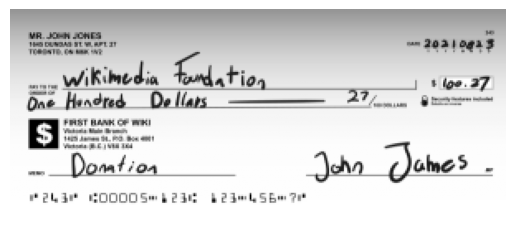

In [10]:
ShowImage(img)

In [11]:
hist = histogram(img)

Text(0, 0.5, 'Frequency')

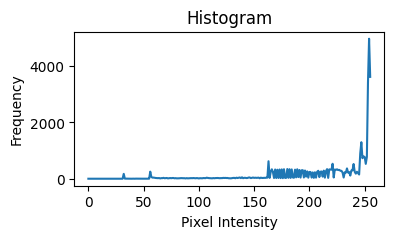

In [13]:
plt.figure(figsize=(4,2))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

In [14]:
thresh = int(np.mean(img))
print(thresh)

219


In [15]:
Tot = np.sum(hist)
prob = hist / Tot

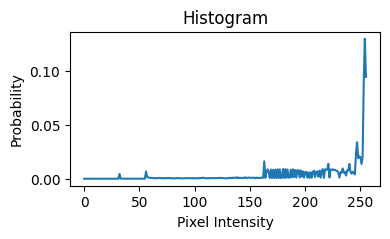

1.0000000000000002


In [17]:
plt.figure(figsize=(4,2))
plt.plot(prob)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')
plt.show()

print(np.sum(prob))

In [18]:
w0 = np.sum(prob[:thresh]) + 0.00000001
w1 = np.sum(prob[thresh:]) + 0.00000001

In [19]:
u0 = np.sum(np.array([i for i in range(thresh)])*prob[:thresh]) / w0
u1 = np.sum(np.array([i for i in range(thresh,256)])*prob[thresh:]) / w1

In [ ]:
if ( u0 == 0.0):
    thr = u1
elif ( u1 == 0.0):
    thr = u0
else:
    thr = (u0 + u1) / 2
print(thresh, thr)